In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow.keras as keras
from tensorflow.keras import layers, models
import sklearn as sk
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow.keras.applications.resnet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
(x_train, y_train), (x_test, y_test) =keras.datasets.cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

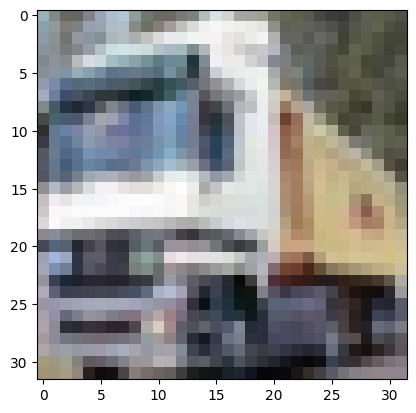

In [4]:
plt.imshow(x_train[1])

In [6]:
y_train.shape

(50000, 1)

In [6]:
y_train[1]

array([9], dtype=uint8)

In [7]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [18]:
# Create an instance of ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,       # Randomly rotate images by up to 40 degrees
    width_shift_range=0.2,   # Randomly shift images horizontally by up to 20%
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20%
    shear_range=0.2,         # Randomly shear images by up to 20%
    zoom_range=0.2,          # Randomly zoom into images by up to 20%
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Fill in any newly created pixels after transformations
)

In [19]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [10]:
# Fit the data generator on the training data
datagen.fit(x_train)

In [ ]:
# Assuming 'model' is already defined and compiled
model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=50, validation_data=(x_test, 

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=700, activation='relu'))
model.add(layers.Dense(units=500, activation='relu'))
model.add(layers.Dense(units=300, activation='relu'))
model.add(layers.Dense(units=150, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))



# Model summary
model.summary()


c:\Users\gg\anaconda3\envs\deep\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 700)            │       807,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       350,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │       150,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,364,720 (5.21 MB)

 Trainable params: 1,364,720 (5.21 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#from tensorflow.keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=4, mode='min', restore_best_weights=True)

In [13]:
# Assuming 'model' is already defined and compiled
model.fit(datagen.flow(x_train, y_train), epochs=20, validation_data=(x_test, y_test))
#model.fit(x_train , y_train, epochs=10,validation_data=(x_test, y_test),callbacks=early_stopping)

Epoch 1/20


c:\Users\gg\anaconda3\envs\deep\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.2575 - loss: 1.9800 - val_accuracy: 0.4680 - val_loss: 1.4724
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.4101 - loss: 1.6132 - val_accuracy: 0.5089 - val_loss: 1.3211
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4596 - loss: 1.4918 - val_accuracy: 0.5258 - val_loss: 1.3998
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4866 - loss: 1.4168 - val_accuracy: 0.5139 - val_loss: 1.3822
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.5100 - loss: 1.3569 - val_accuracy: 0.5675 - val_loss: 1.1758
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5258 - loss: 1.3217 - val_accuracy: 0.5949 - val_loss: 1.1303
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.5407 - loss: 1.2828 - val_accuracy: 0.5709 - val_loss: 1.2190
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.5588 - loss: 1.25

In [14]:
final_train_predictions = np.argmax(model.predict(x_train), axis=1)
final_test_predictions = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_train, final_train_predictions))
print(classification_report(y_test, final_test_predictions))

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      5000
           1       0.78      0.79      0.78      5000
           2       0.79      0.41      0.54      5000
           3       0.59      0.37      0.46      5000
           4       0.68      0.53      0.59      5000
           5       0.61      0.64      0.63      5000
           6       0.48      0.92      0.63      5000
           7       0.73      0.76      0.74      5000
           8       0.92      0.72      0.81      5000
           9       0.65      0.87      0.74      5000

    accuracy                           0.67     50000
   macro avg       0.70      0.67      0.67     50000
weighted avg       0.70      0.67      0.67     50000

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1000
           1       0.76      0.79      0.78     

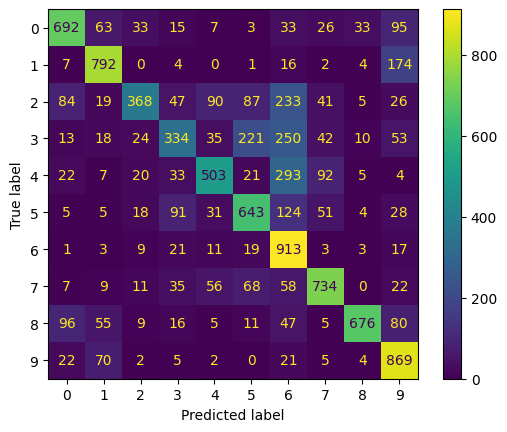

In [15]:
cm=confusion_matrix(y_test, final_test_predictions)
cm_display = sk.metrics.ConfusionMatrixDisplay(cm).plot()
plt.show()

In [20]:
base_model=keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    pooling='avg',
    )

In [21]:
for layer in base_model.layers[:-3]:
    layer.trainable=False

In [22]:
final_model=keras.Sequential(
    [base_model,keras.layers.Dense(10,activation='softmax')]
)

In [18]:
final_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [23]:
final_model=keras.Sequential(
    [base_model,keras.layers.Dense(10,activation='softmax')]
)

In [24]:
final_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
final_model.fit(x_train , y_train, epochs=10,validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 86ms/step - accuracy: 0.2055 - loss: 2.1669 - val_accuracy: 0.3026 - val_loss: 1.9275
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3017 - loss: 1.9343